# Pokemon project.

### Data cleaning and preparation.

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [220]:
df = pd.read_csv('pokemon_data.csv')

In [221]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [223]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [224]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [225]:
df['Total Score'] = df.iloc[:, 4:10].sum(axis = 1)

In [226]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Score
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [227]:
df = df[['Name', 'Type 1', 'Type 2','HP','Attack',
              'Defense','Sp. Atk','Sp. Def','Speed',
              'Total Score','Generation','Legendary']]

In [228]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Score,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False


In [229]:
df['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

# Which Pokemon type has the bigger mean total score?

In [230]:
grouped_type1 = df.groupby('Type 1')['Total Score'].sum()

In [231]:
grouped_type1.unique()

array([26146, 13818, 17617, 19510,  7024, 11244, 23820,  1940, 14066,
       29480, 14000, 10403, 39365, 11176, 27129, 19965, 13168, 48211],
      dtype=int64)

In [232]:
df_tot_type_score = pd.DataFrame(grouped_type1)

In [233]:
df_tot_type_score['count'] = df.groupby('Type 1')['Total Score'].count()

In [234]:
df_tot_type_score = df_tot_type_score.reset_index()

In [235]:
df_tot_type_score.head()

,Type 1,Total Score,count
0,Bug,26146,69
1,Dark,13818,31
2,Dragon,17617,32
3,Electric,19510,44
4,Fairy,7024,17


In [236]:
df_tot_type_score['mean_score'] = (df_tot_type_score['Total Score'] / df_tot_type_score['count']).round()

In [237]:
df_tot_type_score.head(20)

,Type 1,Total Score,count,mean_score
0,Bug,26146,69,379.0
1,Dark,13818,31,446.0
2,Dragon,17617,32,551.0
3,Electric,19510,44,443.0
4,Fairy,7024,17,413.0
5,Fighting,11244,27,416.0
6,Fire,23820,52,458.0
7,Flying,1940,4,485.0
8,Ghost,14066,32,440.0
9,Grass,29480,70,421.0


In [238]:
df_tot_type_score = df_tot_type_score.sort_values('count', ascending = False).reset_index()

In [239]:
height = []
position = []

for i in df_tot_type_score['count']:
    height.append(i)
    
for i in range(18):
    position.append(i)

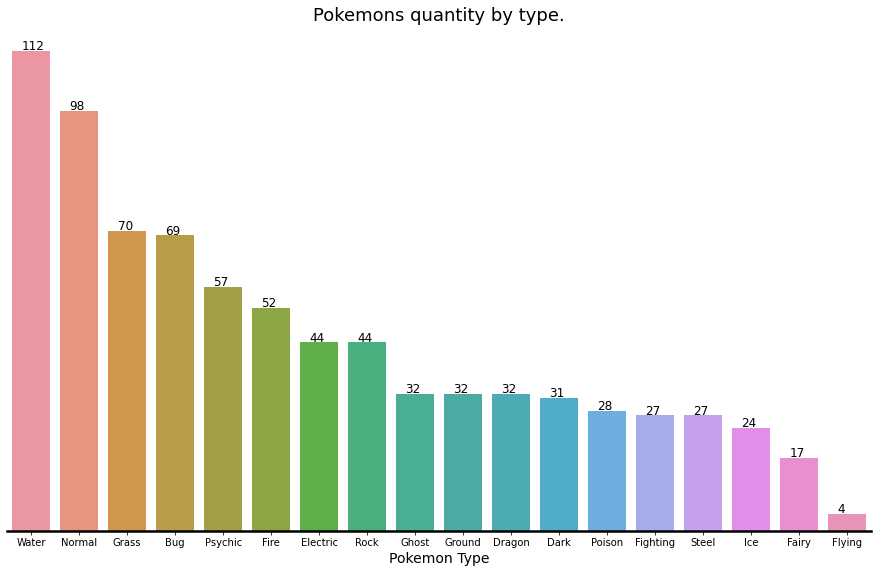

In [240]:
fig = plt.figure(figsize = (12, 7))

ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(x = 'Type 1', y = 'count', data = df_tot_type_score)

ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='y', labelleft=False, left=None)
ax.set_title('Pokemons quantity by type.', fontsize = 18)
ax.set_ylabel('')
ax.set_xlabel('Pokemon Type', fontsize = 14)

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

for i in range(18):
    ax.text(x=position[i]-0.2, y=height[i]+0.2, s=str(height[i]),   
           fontsize=12)


In [241]:
df_tot_type_score = df_tot_type_score.sort_values('mean_score', ascending = False).reset_index()

In [242]:
df_tot_type_score.drop(columns = ['level_0','index'], inplace = True)

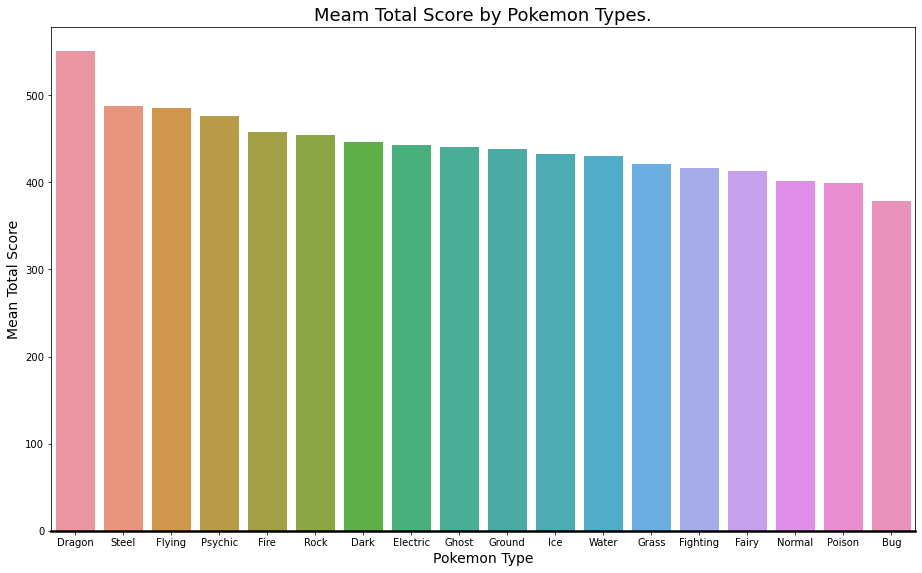

In [243]:
fig = plt.figure(figsize = (12, 7))

ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(x = 'Type 1', y = 'mean_score', data = df_tot_type_score)

ax.set_title('Meam Total Score by Pokemon Types.', fontsize = 18)
ax.set_xlabel('Pokemon Type', fontsize = 14)
ax.set_ylabel('Mean Total Score', fontsize = 14)
ax.spines['bottom'].set_linewidth(2.5)

ax = ax

In [244]:
df_tot_type_score.head()

,Type 1,Total Score,count,mean_score
0,Dragon,17617,32,551.0
1,Steel,13168,27,488.0
2,Flying,1940,4,485.0
3,Psychic,27129,57,476.0
4,Fire,23820,52,458.0


In [245]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Score,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,False


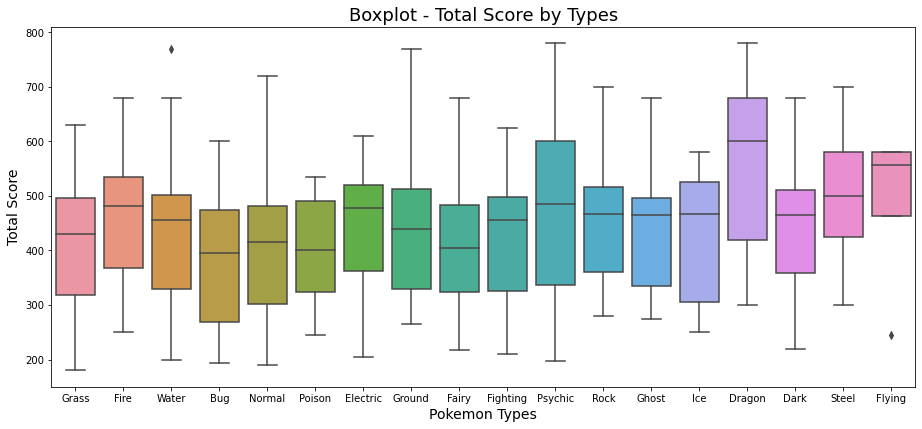

In [246]:
fig = plt.figure(figsize = (12, 5))

ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(x = df['Type 1'], y = df['Total Score'])

ax.set_title('Boxplot - Total Score by Types', fontsize = 18)
ax.set_xlabel('Pokemon Types', fontsize = 14)
ax.set_ylabel('Total Score', fontsize = 14)

ax = ax

In [247]:
df_best_by_type = pd.DataFrame(df.groupby('Type 1')['Total Score'].nlargest(1))

In [248]:
df_best_by_type.reset_index(inplace = True)

In [249]:
df_best_by_type

,Type 1,level_1,Total Score
0,Bug,137,600
1,Dark,793,680
2,Dragon,426,780
3,Electric,196,610
4,Fairy,792,680
5,Fighting,498,625
6,Fire,270,680
7,Flying,702,580
8,Ghost,544,680
9,Grass,275,630


In [250]:
names = []

for index in df_best_by_type['level_1']:
    names.append(df.iloc[index][0])
    
df_best_by_type['Name'] = names

In [251]:
df_best_by_type = df_best_by_type[['Type 1', 'Name', 'Total Score']]

In [252]:
df_best_by_type

,Type 1,Name,Total Score
0,Bug,PinsirMega Pinsir,600
1,Dark,Yveltal,680
2,Dragon,RayquazaMega Rayquaza,780
3,Electric,AmpharosMega Ampharos,610
4,Fairy,Xerneas,680
5,Fighting,LucarioMega Lucario,625
6,Fire,Ho-oh,680
7,Flying,TornadusIncarnate Forme,580
8,Ghost,GiratinaAltered Forme,680
9,Grass,SceptileMega Sceptile,630


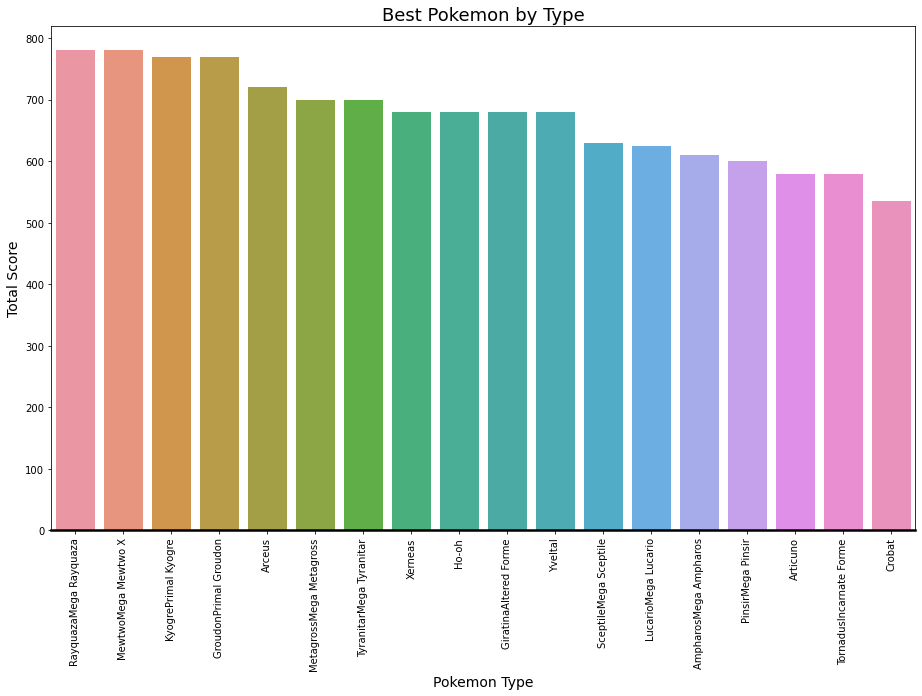

In [253]:
fig = plt.figure(figsize = (12, 7))

ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(x = 'Name', y = 'Total Score', data = df_best_by_type.sort_values('Total Score', ascending = False))

ax.set_title('Best Pokemon by Type', fontsize = 18)
ax.set_xlabel('Pokemon Type', fontsize = 14)
ax.set_ylabel('Total Score', fontsize = 14)
ax.spines['bottom'].set_linewidth(2.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

ax = ax

In [254]:
df['HP'].nlargest(1)
df.iloc[261][0]

'Blissey'

In [255]:
df.columns[3:9]

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [256]:
best_by_skill = []

for skill in df.columns[3:9]:
    best = df[f'{skill}'].nlargest(1)
    best_by_skill.append(best)

best_by_skill

[261    255
 Name: HP, dtype: int64,
 163    190
 Name: Attack, dtype: int64,
 224    230
 Name: Defense, dtype: int64,
 164    194
 Name: Sp. Atk, dtype: int64,
 230    230
 Name: Sp. Def, dtype: int64,
 431    180
 Name: Speed, dtype: int64]

In [257]:
df_top_by_skill = df.iloc[[261, 163, 224, 164, 230, 441]]

In [258]:
df_top_by_skill = df_top_by_skill[['Name', 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk',
                                   'Sp. Def', 'Speed']]

In [259]:
df_top_by_skill

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
261,Blissey,Normal,255,10,10,75,135,55
163,MewtwoMega Mewtwo X,Psychic,106,190,100,154,100,130
224,SteelixMega Steelix,Steel,75,125,230,55,95,30
164,MewtwoMega Mewtwo Y,Psychic,106,150,70,194,120,140
230,Shuckle,Bug,20,10,230,10,230,5
441,Starly,Normal,40,55,30,30,30,60


In [260]:
top_by_skill = {'HP': 'Blissey', 'Attack': 'MewtwoMega Mewtwo X', 'Defence': 'SteelixMega Steelix',
               'Sp. Atk': 'MewtwoMega Mewtwo Y', 'Sp. Def': 'Shuckle', 'Speed': 'Starly'}

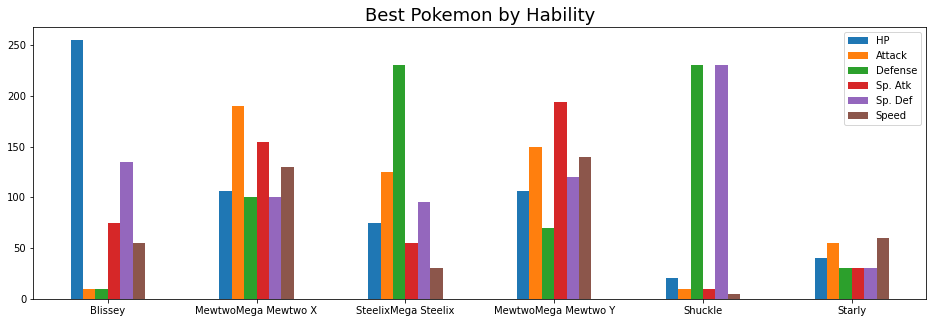

In [261]:
df_top_by_skill.plot(kind = 'bar', figsize = (16, 5), rot = 0)

plt.title('Best Pokemon by Hability', fontsize = 18)
plt.xticks(range(6), df_top_by_skill['Name'])
plt.show()

# Colocar o nome do melhor pokémon por skill.

In [262]:
df.HP.max()

255

In [263]:
top_10 = df.sort_values('Total Score', ascending = False).head(10)
top_10

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Score,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,780,3,True
164,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,780,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,780,1,True
422,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,770,3,True
424,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,770,3,True
552,Arceus,Normal,NaN,120,120,120,120,120,120,720,4,True
712,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,700,5,True
711,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,700,5,True
409,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,700,3,False
413,MetagrossMega Metagross,Steel,Psychic,80,145,150,105,110,110,700,3,False


In [264]:
top_10 = top_10[['Name','HP', 'Attack','Defense','Sp. Atk','Sp. Def','Speed']]
top_10

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
426,RayquazaMega Rayquaza,105,180,100,180,100,115
164,MewtwoMega Mewtwo Y,106,150,70,194,120,140
163,MewtwoMega Mewtwo X,106,190,100,154,100,130
422,KyogrePrimal Kyogre,100,150,90,180,160,90
424,GroudonPrimal Groudon,100,180,160,150,90,90
552,Arceus,120,120,120,120,120,120
712,KyuremWhite Kyurem,125,120,90,170,100,95
711,KyuremBlack Kyurem,125,170,100,120,90,95
409,SalamenceMega Salamence,95,145,130,120,90,120
413,MetagrossMega Metagross,80,145,150,105,110,110


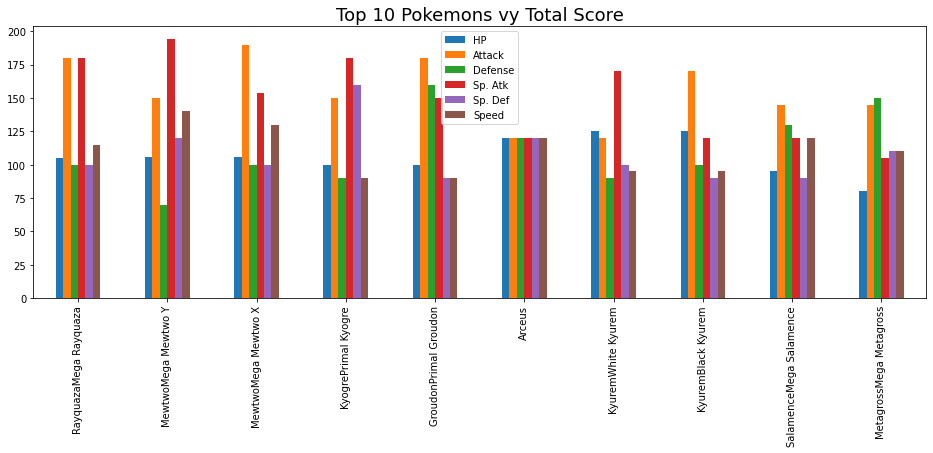

In [269]:
top_10.plot(kind = 'bar', figsize = (16, 5), rot = 90)

plt.title('Top 10 Pokemons vy Total Score', fontsize = 18)
plt.xticks(range(10), top_10['Name'])
plt.show()